In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
models = [
    "pca",
    "mosaicfm-70m-pretrained",
    "mosaicfm-70m-adapted",
    "mosaicfm-70m-from-scratch",
    "mosaicfm-70m-tahoe",
    "mosaicfm-70m-merged",
    "mosaicfm-v2-1_3b-merged"
]

### mosaic, regression

In [3]:
results = pd.concat([pd.read_csv(f"/vevo/umair/data/sens-pred/results/mosaic_regression_{m}.csv") for m in models])
results

,condition,embedding,r2,permuted,permuted-iter
0,"[('Cetuximab', 0.068596, 'uM')]",pca,-0.114964,False,0
1,"[('Cetuximab', 0.068596, 'uM')]",pca,-0.392099,True,1
2,"[('Cetuximab', 0.068596, 'uM')]",pca,-0.191552,True,2
3,"[('Cetuximab', 0.068596, 'uM')]",pca,-0.067275,True,3
4,"[('Encorafenib', 0.1, 'uM')]",pca,-0.604864,False,0
...,...,...,...,...,...
359,"[('Adagrasib', 0.005, 'uM'), ('LY3200882', 0.5...",mosaicfm-v2-1_3b-merged,-0.065533,True,3
360,"[('LY3200882', 0.1, 'uM'), ('Adagrasib', 0.005...",mosaicfm-v2-1_3b-merged,0.097916,False,0
361,"[('LY3200882', 0.1, 'uM'), ('Adagrasib', 0.005...",mosaicfm-v2-1_3b-merged,-0.092048,True,1
362,"[('LY3200882', 0.1, 'uM'), ('Adagrasib', 0.005...",mosaicfm-v2-1_3b-merged,-0.063592,True,2


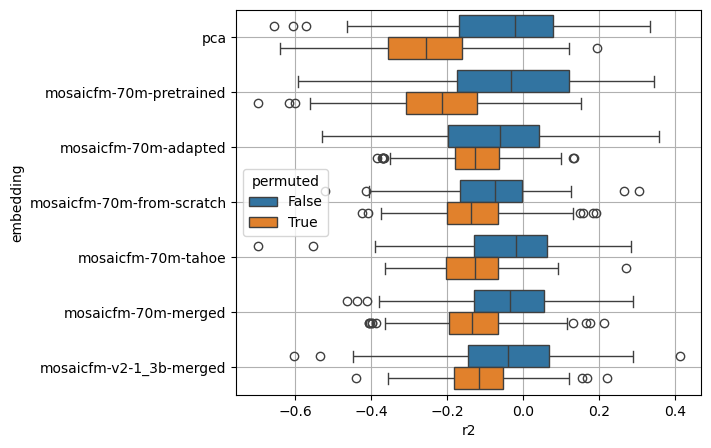

In [4]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

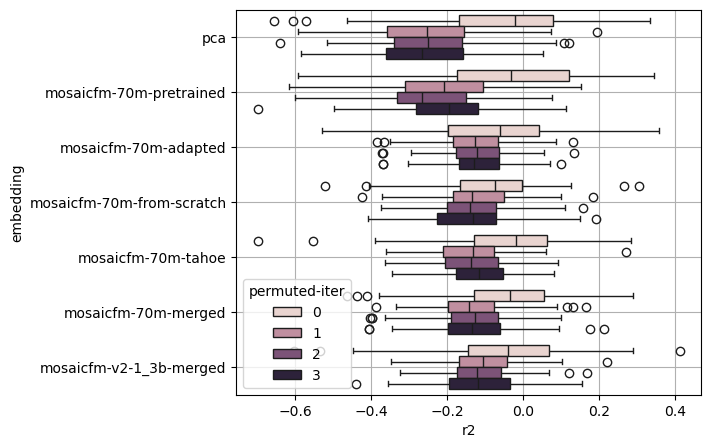

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

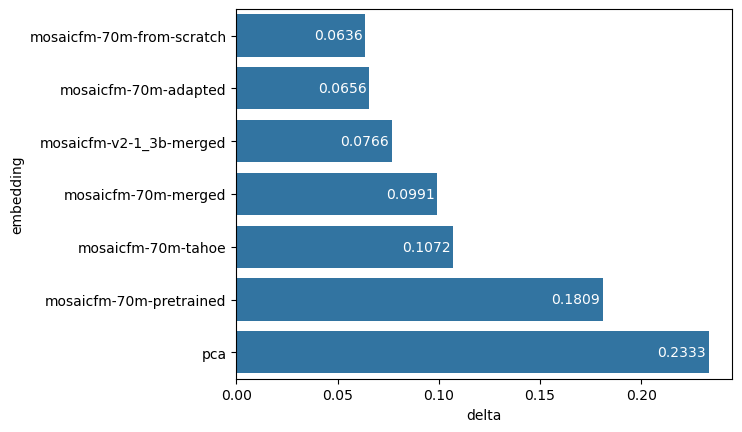

In [6]:
medians = results.groupby(["embedding", "permuted"])["r2"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta"}).sort_values(by="delta")
ax = sns.barplot(data=diffs, x="delta", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta"]], fontsize=10, padding=-37, color="white")
plt.show()

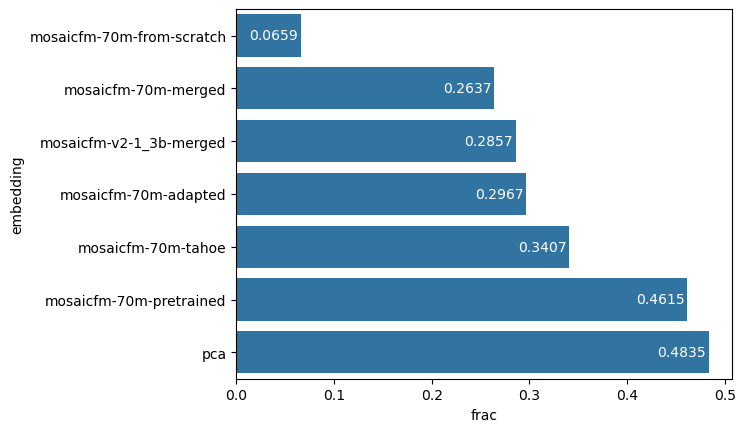

In [7]:
thresholds = results[results["permuted"] == True].groupby("embedding")["r2"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["r2"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"r2": "frac"}).sort_values(by="frac")
ax = sns.barplot(data=fracs, x="frac", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac"]], fontsize=10, padding=-37, color="white")
plt.show()

### mosaic, classification

In [8]:
results = pd.concat([pd.read_csv(f"/vevo/umair/data/sens-pred/results/mosaic_classification_{m}.csv") for m in models])
results

,condition,embedding,auroc,auprc,permuted,permuted-iter
0,"[('Cetuximab', 0.068596, 'uM')]",pca,0.508929,0.600260,False,0
1,"[('Cetuximab', 0.068596, 'uM')]",pca,0.588542,0.656222,True,1
2,"[('Cetuximab', 0.068596, 'uM')]",pca,0.462798,0.517768,True,2
3,"[('Cetuximab', 0.068596, 'uM')]",pca,0.462798,0.527073,True,3
4,"[('Encorafenib', 0.1, 'uM')]",pca,0.335556,0.457882,False,0
...,...,...,...,...,...,...
359,"[('Adagrasib', 0.005, 'uM'), ('LY3200882', 0.5...",mosaicfm-v2-1_3b-merged,0.527407,0.562509,True,3
360,"[('LY3200882', 0.1, 'uM'), ('Adagrasib', 0.005...",mosaicfm-v2-1_3b-merged,0.673363,0.739507,False,0
361,"[('LY3200882', 0.1, 'uM'), ('Adagrasib', 0.005...",mosaicfm-v2-1_3b-merged,0.575893,0.605873,True,1
362,"[('LY3200882', 0.1, 'uM'), ('Adagrasib', 0.005...",mosaicfm-v2-1_3b-merged,0.530506,0.558920,True,2


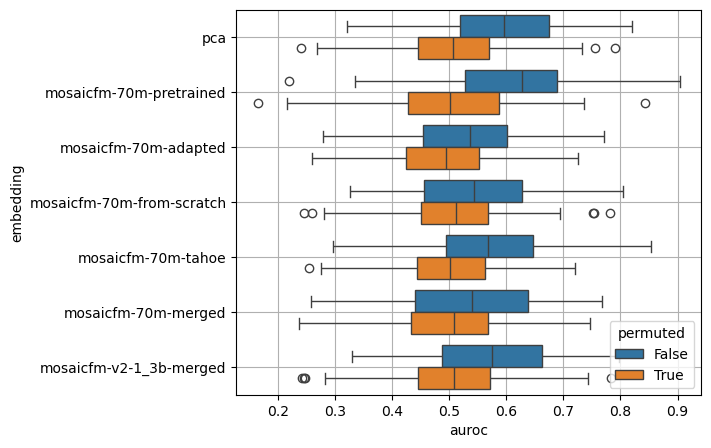

In [9]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auroc", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

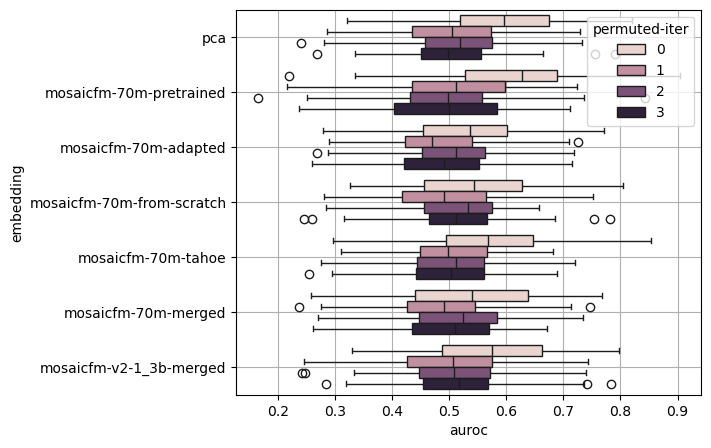

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auroc", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

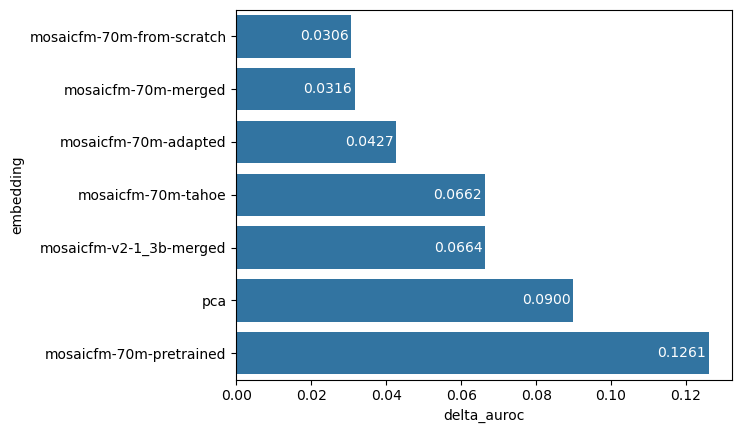

In [11]:
medians = results.groupby(["embedding", "permuted"])["auroc"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta_auroc"}).sort_values(by="delta_auroc")
ax = sns.barplot(data=diffs, x="delta_auroc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta_auroc"]], fontsize=10, padding=-37, color="white")
plt.show()

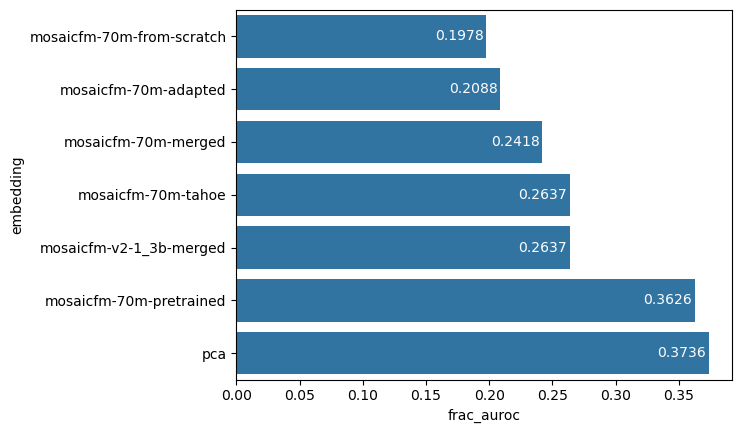

In [12]:
thresholds = results[results["permuted"] == True].groupby("embedding")["auroc"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["auroc"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"auroc": "frac_auroc"}).sort_values(by="frac_auroc")
ax = sns.barplot(data=fracs, x="frac_auroc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac_auroc"]], fontsize=10, padding=-37, color="white")
plt.show()

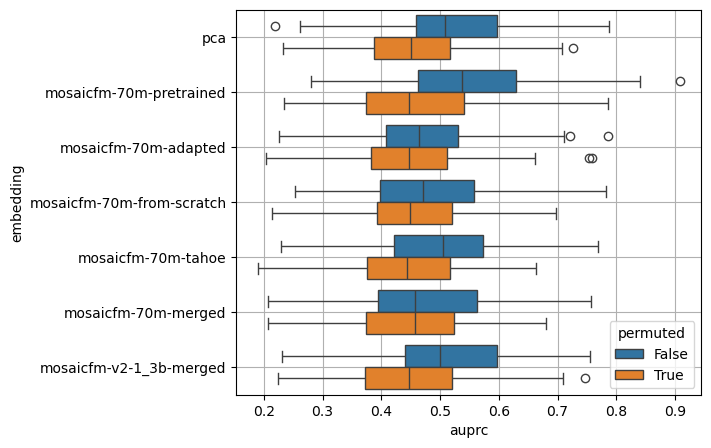

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auprc", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

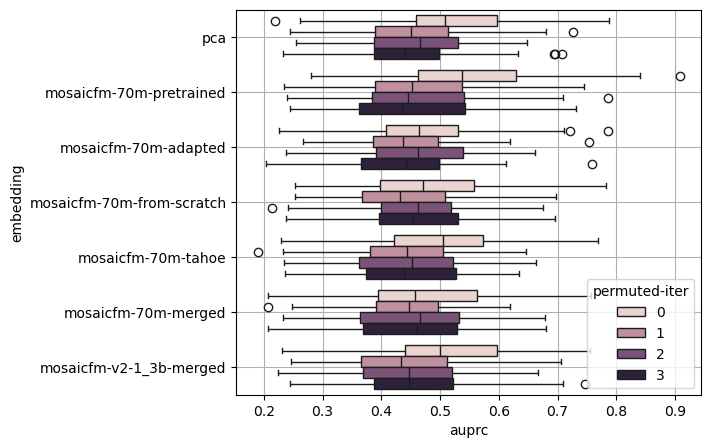

In [14]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auprc", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

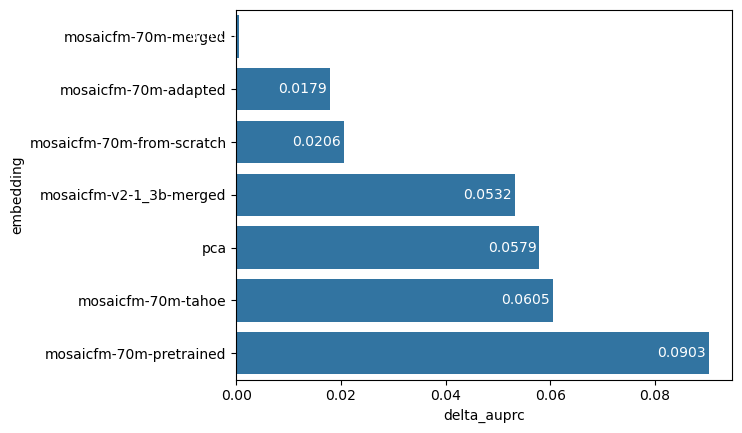

In [15]:
medians = results.groupby(["embedding", "permuted"])["auprc"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta_auprc"}).sort_values(by="delta_auprc")
ax = sns.barplot(data=diffs, x="delta_auprc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta_auprc"]], fontsize=10, padding=-37, color="white")
plt.show()

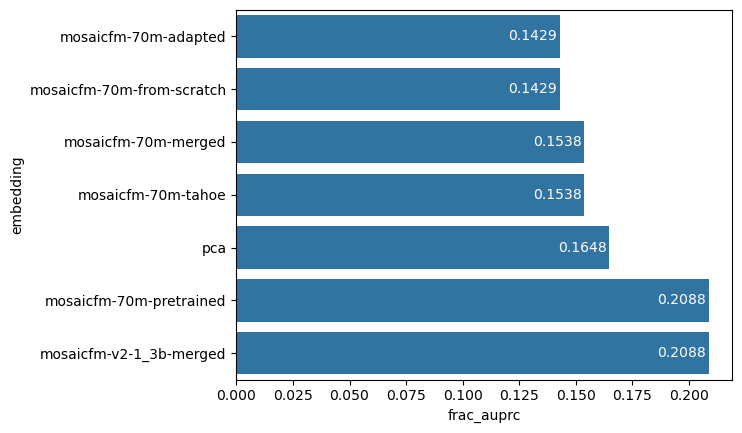

In [16]:
thresholds = results[results["permuted"] == True].groupby("embedding")["auprc"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["auprc"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"auprc": "frac_auprc"}).sort_values(by="frac_auprc")
ax = sns.barplot(data=fracs, x="frac_auprc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac_auprc"]], fontsize=10, padding=-37, color="white")
plt.show()

### prism, regression

In [17]:
results = pd.concat([pd.read_csv(f"/vevo/umair/data/sens-pred/results/prism_regression_{m}.csv") for m in models])
results

,condition,embedding,r2,permuted,permuted-iter
0,BRD-A00077618-236-07-6::2.5::HTS,pca,-0.069236,False,0
1,BRD-A00077618-236-07-6::2.5::HTS,pca,-0.114002,True,1
2,BRD-A00077618-236-07-6::2.5::HTS,pca,-0.103686,True,2
3,BRD-A00077618-236-07-6::2.5::HTS,pca,-0.083433,True,3
4,BRD-A00100033-001-08-9::2.5::HTS,pca,-0.065745,False,0
...,...,...,...,...,...
18739,BRD-K99919177-001-01-3::2.5::MTS004,mosaicfm-v2-1_3b-merged,-0.039639,True,3
18740,BRD-M63173034-001-03-6::2.64076472::MTS004,mosaicfm-v2-1_3b-merged,-0.059370,False,0
18741,BRD-M63173034-001-03-6::2.64076472::MTS004,mosaicfm-v2-1_3b-merged,-0.103779,True,1
18742,BRD-M63173034-001-03-6::2.64076472::MTS004,mosaicfm-v2-1_3b-merged,-0.063932,True,2


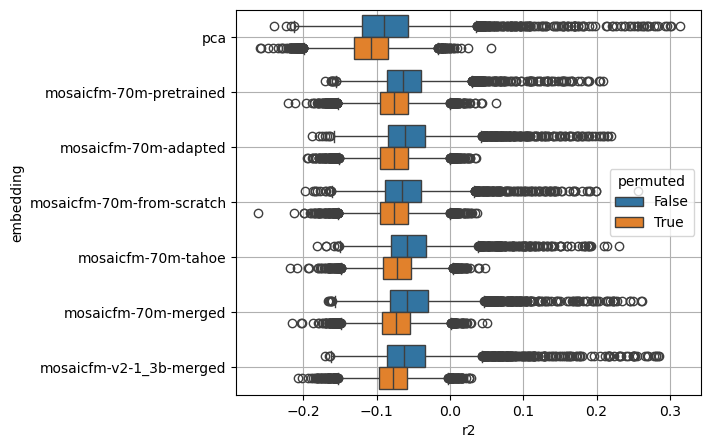

In [18]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

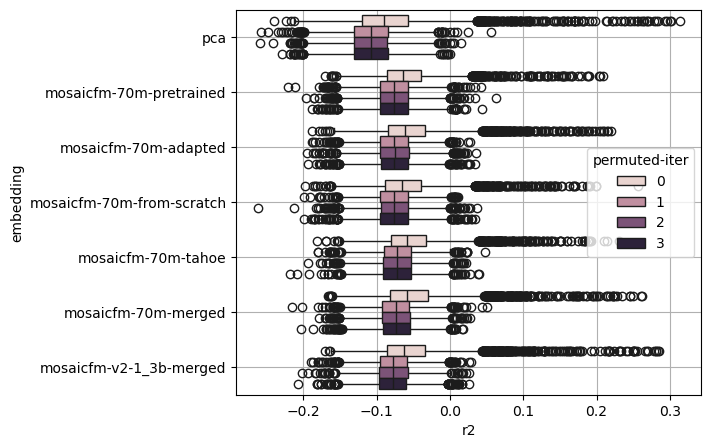

In [19]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

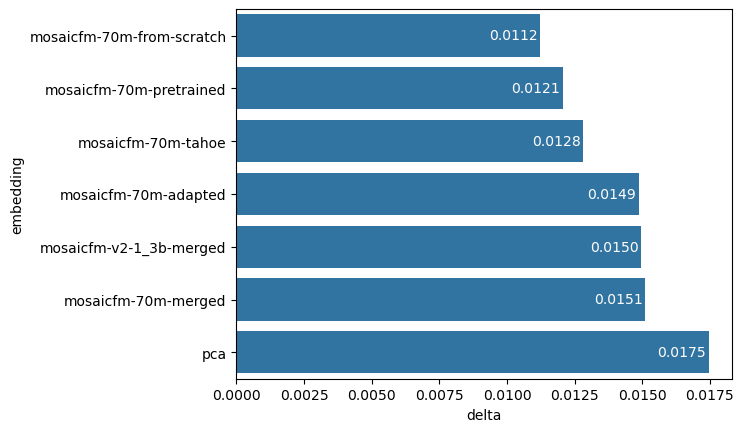

In [20]:
medians = results.groupby(["embedding", "permuted"])["r2"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta"}).sort_values(by="delta")
ax = sns.barplot(data=diffs, x="delta", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta"]], fontsize=10, padding=-37, color="white")
plt.show()

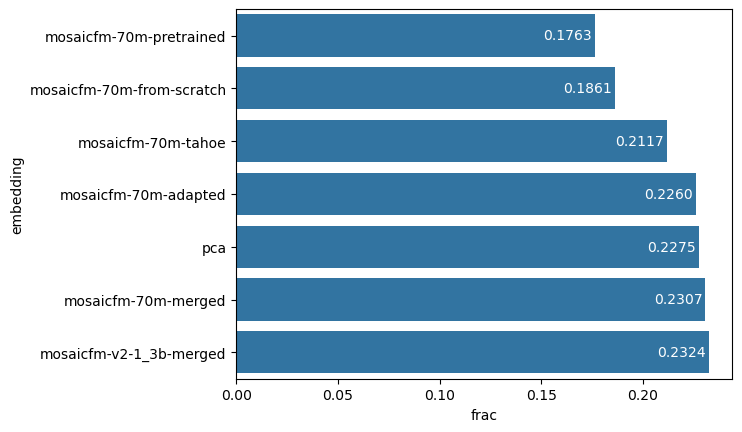

In [21]:
thresholds = results[results["permuted"] == True].groupby("embedding")["r2"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["r2"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"r2": "frac"}).sort_values(by="frac")
ax = sns.barplot(data=fracs, x="frac", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac"]], fontsize=10, padding=-37, color="white")
plt.show()

### prism, classification

In [22]:
results = pd.concat([pd.read_csv(f"/vevo/umair/data/sens-pred/results/prism_classification_{m}.csv") for m in models])
results

,condition,embedding,auroc,auprc,permuted,permuted-iter
0,BRD-A00077618-236-07-6::2.5::HTS,pca,0.494975,0.489460,False,0
1,BRD-A00077618-236-07-6::2.5::HTS,pca,0.521710,0.528164,True,1
2,BRD-A00077618-236-07-6::2.5::HTS,pca,0.529079,0.527139,True,2
3,BRD-A00077618-236-07-6::2.5::HTS,pca,0.498899,0.487563,True,3
4,BRD-A00100033-001-08-9::2.5::HTS,pca,0.594728,0.789054,False,0
...,...,...,...,...,...,...
18559,BRD-K99919177-001-01-3::2.5::MTS004,mosaicfm-v2-1_3b-merged,0.474419,0.997558,True,3
18560,BRD-M63173034-001-03-6::2.64076472::MTS004,mosaicfm-v2-1_3b-merged,0.445894,0.265021,False,0
18561,BRD-M63173034-001-03-6::2.64076472::MTS004,mosaicfm-v2-1_3b-merged,0.437297,0.264579,True,1
18562,BRD-M63173034-001-03-6::2.64076472::MTS004,mosaicfm-v2-1_3b-merged,0.524633,0.305815,True,2


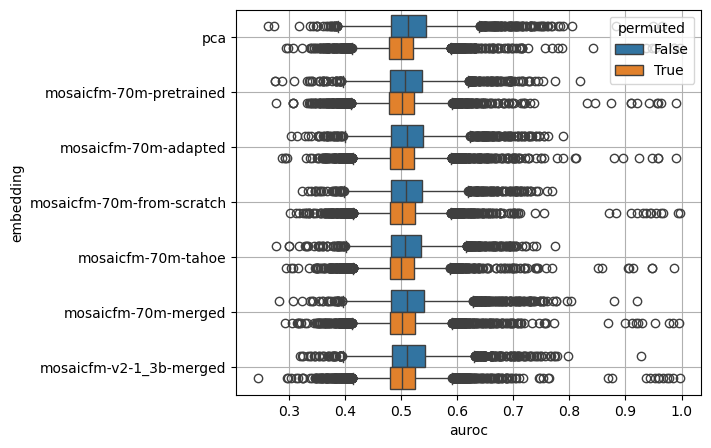

In [23]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auroc", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

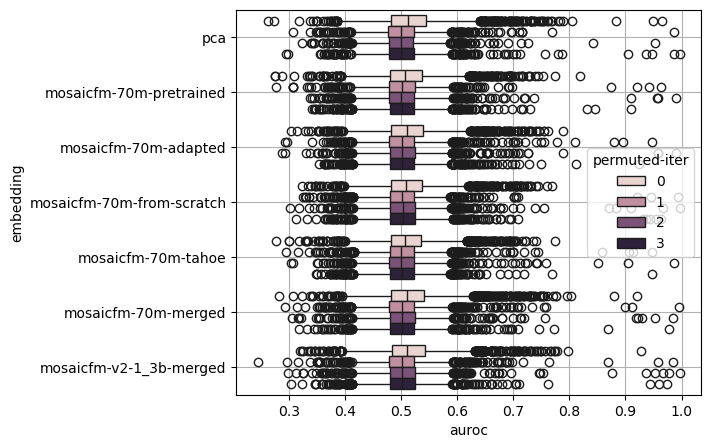

In [24]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auroc", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

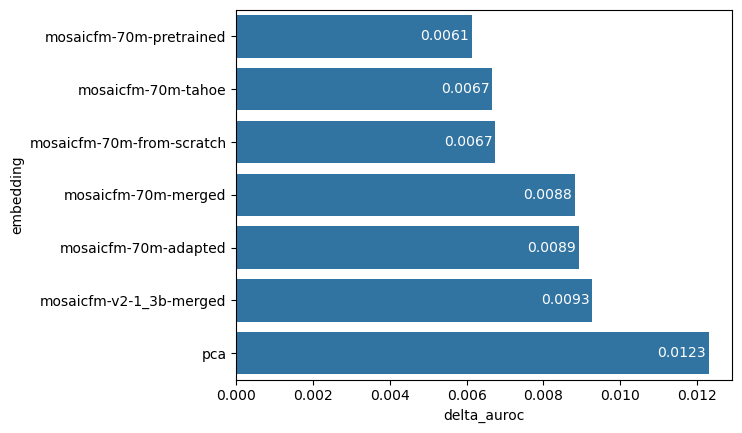

In [25]:
medians = results.groupby(["embedding", "permuted"])["auroc"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta_auroc"}).sort_values(by="delta_auroc")
ax = sns.barplot(data=diffs, x="delta_auroc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta_auroc"]], fontsize=10, padding=-37, color="white")
plt.show()

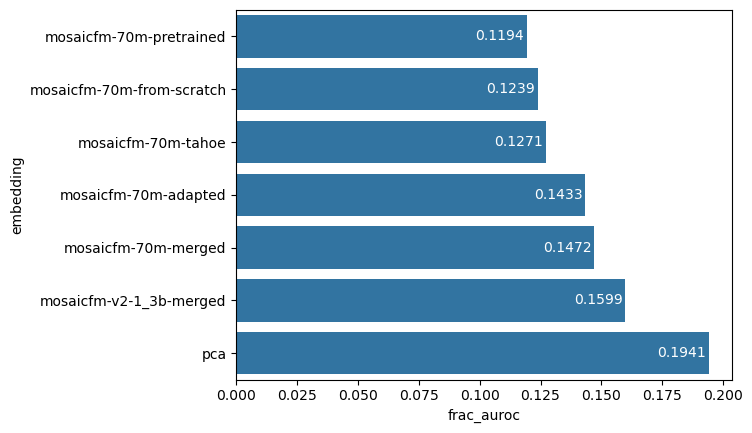

In [26]:
thresholds = results[results["permuted"] == True].groupby("embedding")["auroc"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["auroc"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"auroc": "frac_auroc"}).sort_values(by="frac_auroc")
ax = sns.barplot(data=fracs, x="frac_auroc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac_auroc"]], fontsize=10, padding=-37, color="white")
plt.show()

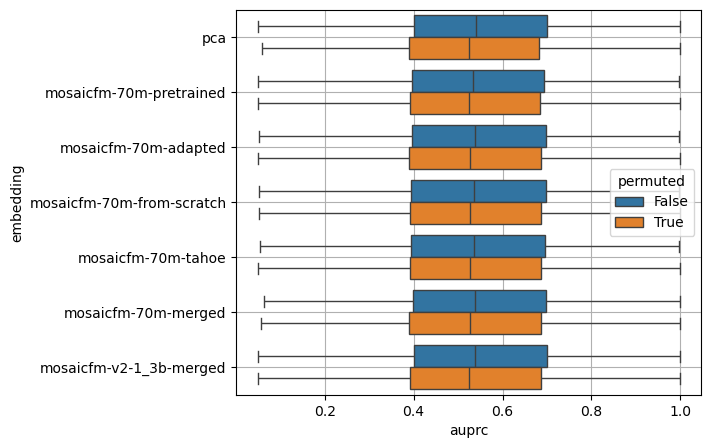

In [27]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auprc", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

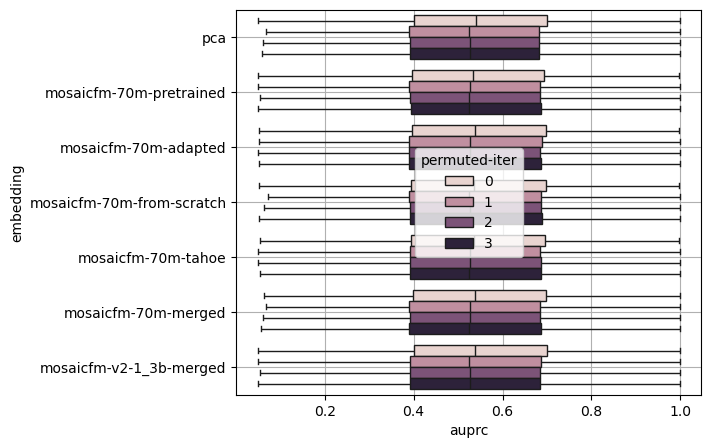

In [28]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auprc", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

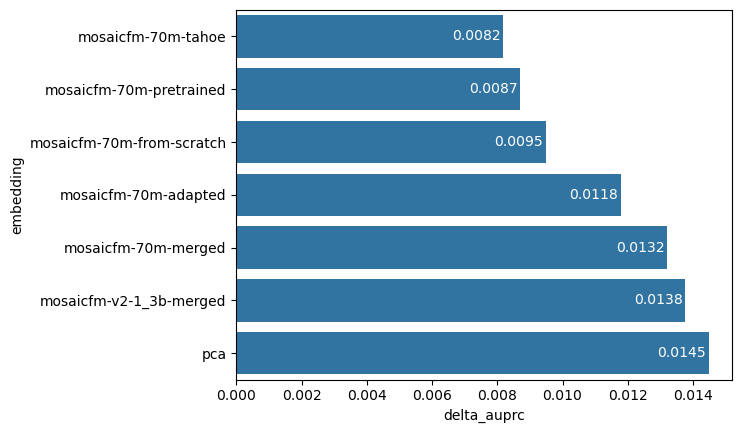

In [29]:
medians = results.groupby(["embedding", "permuted"])["auprc"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta_auprc"}).sort_values(by="delta_auprc")
ax = sns.barplot(data=diffs, x="delta_auprc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta_auprc"]], fontsize=10, padding=-37, color="white")
plt.show()

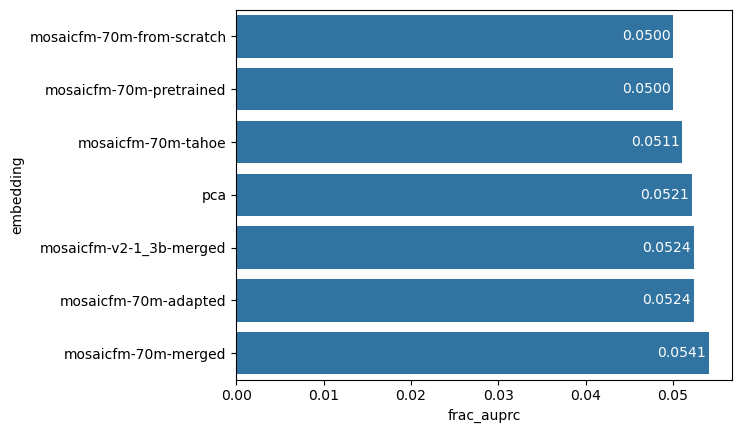

In [30]:
thresholds = results[results["permuted"] == True].groupby("embedding")["auprc"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["auprc"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"auprc": "frac_auprc"}).sort_values(by="frac_auprc")
ax = sns.barplot(data=fracs, x="frac_auprc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac_auprc"]], fontsize=10, padding=-37, color="white")
plt.show()

### prism-sec, regression

In [31]:
results = pd.concat([pd.read_csv(f"/vevo/umair/data/sens-pred/results/prism-sec_regression_{m}.csv") for m in models])
results

FileNotFoundError: [Errno 2] No such file or directory: '/vevo/umair/data/sens-pred/results/prism-sec_regression_mosaicfm-v2-1_3b-merged.csv'

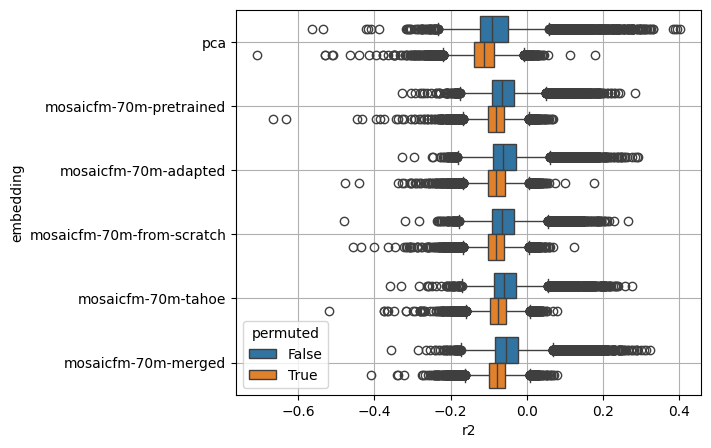

In [39]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

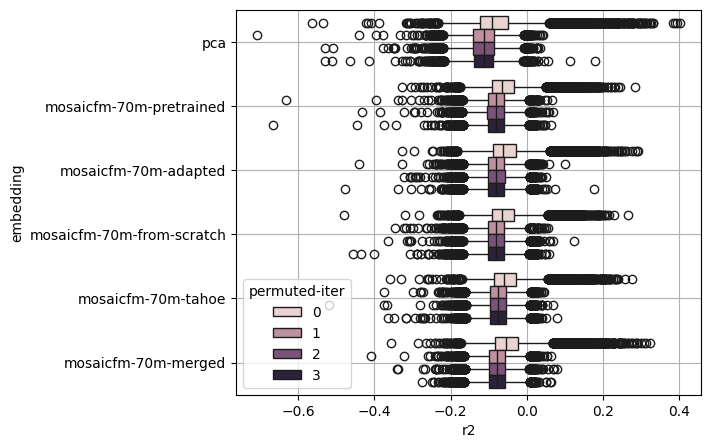

In [40]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="r2", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

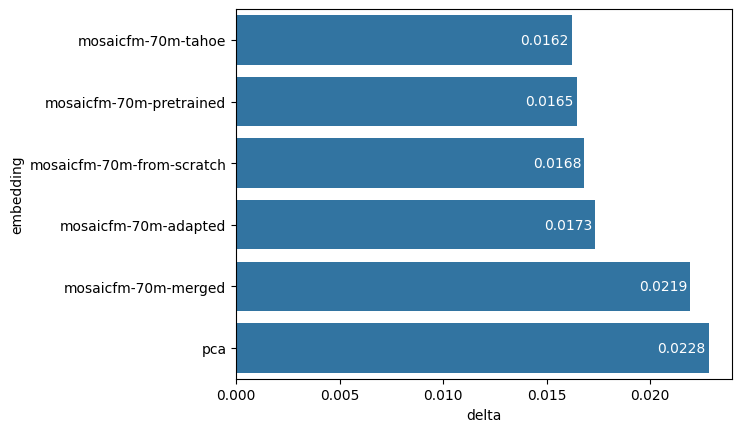

In [41]:
medians = results.groupby(["embedding", "permuted"])["r2"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta"}).sort_values(by="delta")
ax = sns.barplot(data=diffs, x="delta", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta"]], fontsize=10, padding=-37, color="white")
plt.show()

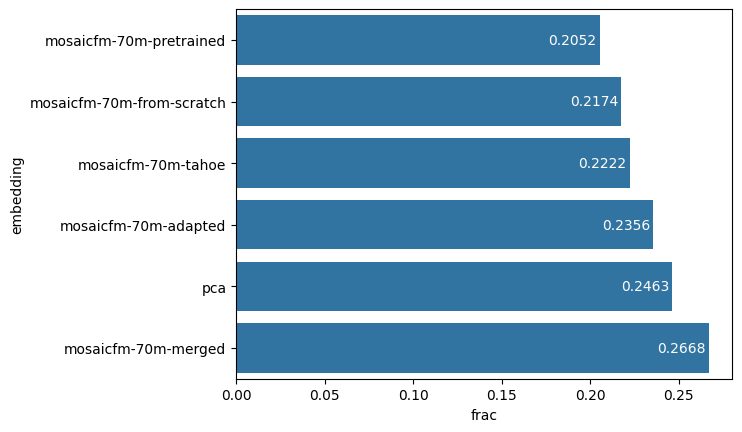

In [42]:
thresholds = results[results["permuted"] == True].groupby("embedding")["r2"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["r2"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"r2": "frac"}).sort_values(by="frac")
ax = sns.barplot(data=fracs, x="frac", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac"]], fontsize=10, padding=-37, color="white")
plt.show()

### prism-sec, classification

In [32]:
results = pd.concat([pd.read_csv(f"/vevo/umair/data/sens-pred/results/prism-sec_classification_{m}.csv") for m in models])
results

FileNotFoundError: [Errno 2] No such file or directory: '/vevo/umair/data/sens-pred/results/prism-sec_classification_mosaicfm-v2-1_3b-merged.csv'

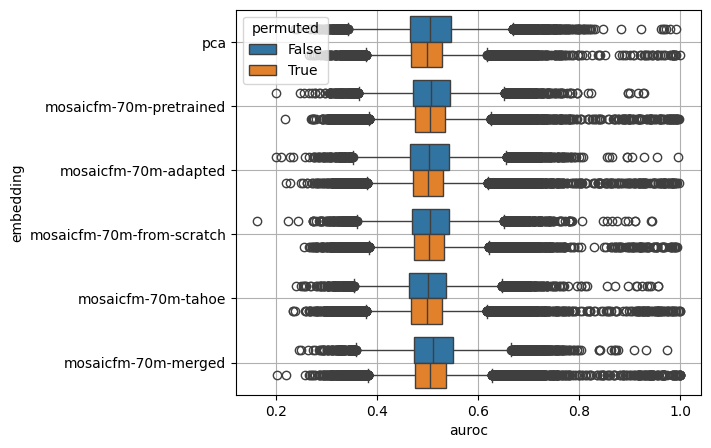

In [44]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auroc", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

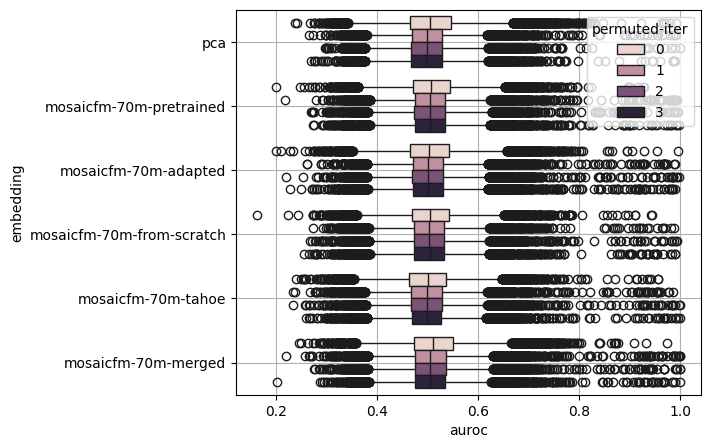

In [45]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auroc", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

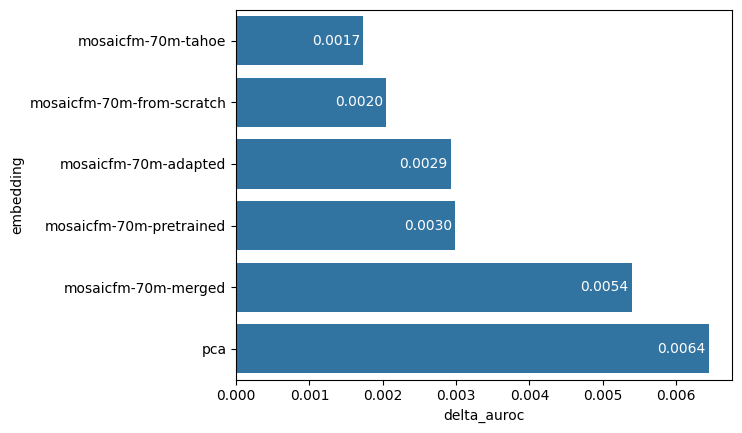

In [46]:
medians = results.groupby(["embedding", "permuted"])["auroc"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta_auroc"}).sort_values(by="delta_auroc")
ax = sns.barplot(data=diffs, x="delta_auroc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta_auroc"]], fontsize=10, padding=-37, color="white")
plt.show()

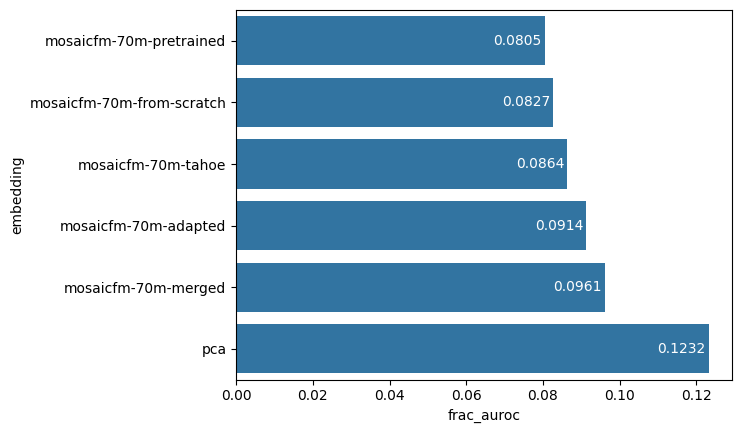

In [47]:
thresholds = results[results["permuted"] == True].groupby("embedding")["auroc"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["auroc"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"auroc": "frac_auroc"}).sort_values(by="frac_auroc")
ax = sns.barplot(data=fracs, x="frac_auroc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac_auroc"]], fontsize=10, padding=-37, color="white")
plt.show()

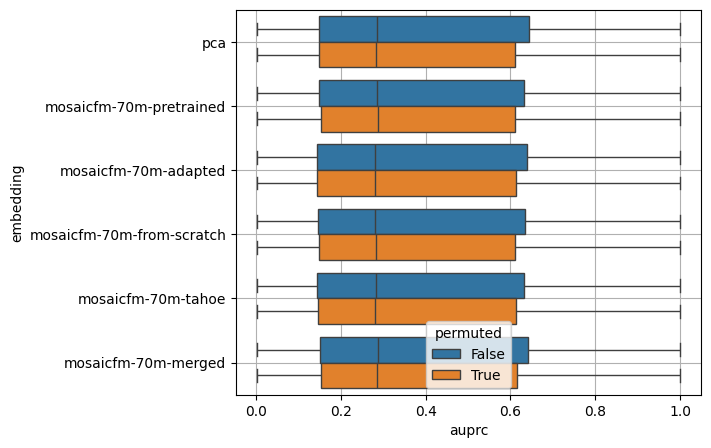

In [48]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auprc", y="embedding", hue="permuted", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

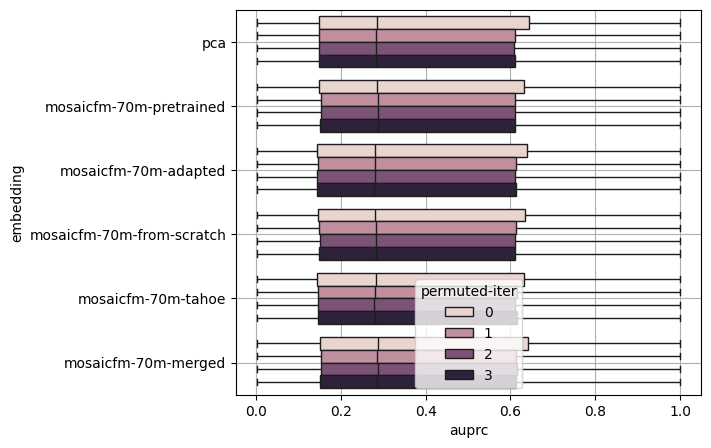

In [49]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(data=results, x="auprc", y="embedding", hue="permuted-iter", order=models, ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

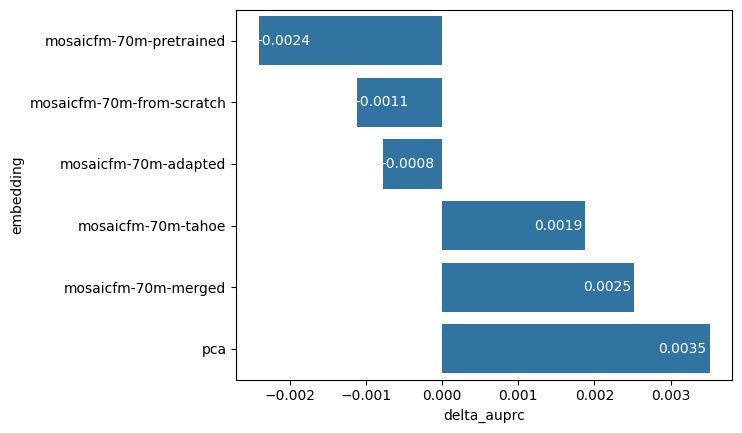

In [50]:
medians = results.groupby(["embedding", "permuted"])["auprc"].median().unstack()
diffs = (medians[False] - medians[True]).reset_index().rename(columns={0: "delta_auprc"}).sort_values(by="delta_auprc")
ax = sns.barplot(data=diffs, x="delta_auprc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in diffs["delta_auprc"]], fontsize=10, padding=-37, color="white")
plt.show()

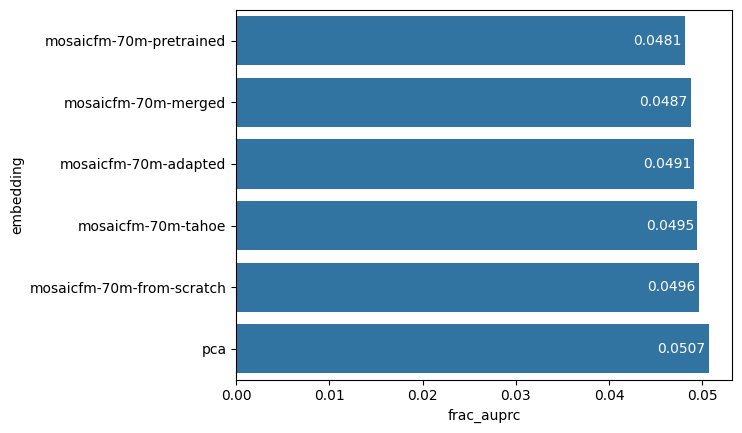

In [51]:
thresholds = results[results["permuted"] == True].groupby("embedding")["auprc"].quantile(0.95)
fracs = (results[results["permuted"] == False].groupby("embedding")["auprc"].apply(lambda x: (x > thresholds[x.name]).mean())).reset_index().rename(columns={"auprc": "frac_auprc"}).sort_values(by="frac_auprc")
ax = sns.barplot(data=fracs, x="frac_auprc", y="embedding")
ax.bar_label(ax.containers[0], labels=[f"{x:.4f}" for x in fracs["frac_auprc"]], fontsize=10, padding=-37, color="white")
plt.show()